In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [425]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [426]:
df_sorted = df.sort_values('HeartDisease')
df_sorted.shape

(319795, 18)

In [427]:
df_sorted.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [428]:
292422 / 27373

10.682862674898622

In [429]:
df_test= df_sorted.sample(frac=0.05, random_state=1)
df_test = pd.get_dummies(df_test, drop_first=True)
X_test = df_test.drop("HeartDisease_Yes", axis= 1)
y_test = df_test.HeartDisease_Yes

seperate the dataset into 10 different Datasets

In [430]:
df1 = df_sorted.iloc[0:27373]

In [431]:
df2 = df_sorted.iloc[27373:(27373*2)]
df3 = df_sorted.iloc[(27373*2):(27373*3)]
df4 = df_sorted.iloc[(27373*3):(27373*4)]
df5 = df_sorted.iloc[(27373*4):(27373*5)]
df6 = df_sorted.iloc[(27373*5):(27373*6)]
df7 = df_sorted.iloc[(27373*6):(27373*7)]
df8 = df_sorted.iloc[(27373*7):(27373*8)]
df9 = df_sorted.iloc[(27373*8):(27373*9)]
df10 = df_sorted.iloc[(27373*9):(27373*10)]

In [432]:
df_yes = df_sorted.iloc[292422 : 319795]

In [433]:
df_yes.HeartDisease.value_counts()

Yes    27373
Name: HeartDisease, dtype: int64

In [434]:
list_of_datasets= [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
name_of_datasets = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10']
for i, j in zip(list_of_datasets, name_of_datasets):
    i.reset_index(drop= True, inplace=True)
    exec('{}_concat = pd.concat((i, df_yes), axis=0)'.format(j))
    df = df.sample(frac=1, random_state=1).reset_index(drop=True)


In [435]:
list_of_datasets= [df1_concat, df2_concat, df3_concat, df4_concat, df5_concat, df6_concat, df7_concat, df8_concat, df9_concat, df10_concat]
name_of_datasets = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10']
for i, j in zip(list_of_datasets, name_of_datasets):
    exec(f"{j}_concat = i.sample(frac=1, random_state=1).reset_index(drop=True)")

In [436]:
df4_concat.HeartDisease.value_counts()

No     27373
Yes    27373
Name: HeartDisease, dtype: int64

In [437]:
list_of_datasets= [df1_concat, df2_concat, df3_concat, df4_concat, df5_concat, df6_concat, df7_concat, df8_concat, df9_concat, df10_concat]
name_of_datasets = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10']
for a, b in zip(list_of_datasets, name_of_datasets):
    exec('{}_withdummies = pd.get_dummies(a, drop_first= True)'.format(b))

#NEW MODEL

#### Using df10 as test set

In [438]:
# X_test = df10_withdummies.drop('HeartDisease_Yes', axis=1)
# y_test = df10_withdummies.HeartDisease_Yes

In [439]:
def predictionmodelfinal(testset):
    from sklearn.model_selection import train_test_split
    from xgboost import XGBClassifier

    list_of_datasets= [df1_withdummies, df2_withdummies, df3_withdummies, df4_withdummies, df5_withdummies, df6_withdummies, df7_withdummies, df8_withdummies, df9_withdummies, df10_withdummies]
    name_of_datasets = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10' ]

    xgb = XGBClassifier()
    for i, j in zip(list_of_datasets, name_of_datasets):
        trainset = []
        exec(f'X_train{j} = i.drop("HeartDisease_Yes", axis=1)')
        exec(f'y_train{j} = i.HeartDisease_Yes')
    trainset = ['X_traindf1', 'X_traindf2', 'X_traindf3', 'X_traindf4', 'X_traindf5', 'X_traindf6', 'X_traindf7', 'X_traindf8', 'X_traindf9', 'X_traindf10']

    for i in (list_of_datasets):
        xgb.fit(i)


In [440]:
list_of_datasets= [df1_withdummies, df2_withdummies, df3_withdummies, df4_withdummies, df5_withdummies, df6_withdummies, df7_withdummies, df8_withdummies, df9_withdummies, df10_withdummies]
name_of_datasets = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9','df10']
for i, j in zip(list_of_datasets, name_of_datasets):
    exec(f'X_train{j} = i.drop("HeartDisease_Yes", axis=1)')
    exec(f'y_train{j} = i.HeartDisease_Yes')
trainset = [X_traindf1, X_traindf2, X_traindf3, X_traindf4, X_traindf5, X_traindf6, X_traindf7, X_traindf8, X_traindf9, X_traindf10]
testset = [y_traindf1, y_traindf2, y_traindf3, y_traindf4, y_traindf5, y_traindf6, y_traindf7, y_traindf8, y_traindf9,y_traindf10]



In [441]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
predictdataframe= pd.DataFrame()
list_of_datasets= ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10']

for i, j, k  in zip(trainset, testset,  list_of_datasets):
    xgb.fit(i, j)
    exec(f'{k}_pred = xgb.predict(X_test)')

In [442]:
predicted= [df1_pred, df2_pred, df3_pred, df4_pred, df5_pred, df6_pred, df7_pred, df8_pred, df9_pred, df10_pred]
predictedcol = ['df1_pred', 'df2_pred', 'df3_pred', 'df4_pred', 'df5_pred', 'df6_pred', 'df7_pred', 'df8_pred', 'df9_pred', 'df10_pred']

In [443]:
predicteddf = pd.DataFrame({'df1_pred': df1_pred , 'df2_pred': df2_pred, 'df3_pred': df3_pred, 'df4_pred':df4_pred, 'df5_pred': df5_pred, 'df6_pred': df6_pred, 'df7_pred':df7_pred , 'df8_pred':df8_pred , 'df9_pred':df9_pred, 'df10_pred':df10_pred})

In [444]:
predicteddf['mode'] = predicteddf.mode(axis=1)[0]

In [445]:
from sklearn.metrics import precision_score,recall_score, accuracy_score
from sklearn.metrics import f1_score

In [446]:
y_pred = predicteddf["mode"].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy Score: 0.7437773608505316
Precission Score: 0.23142630115216528
percentage mislabbled: 25.622263914946842
total ones: 1393
Number of Mislabbled Ones: 228
total zeroes: 14597
Number of Mislabbled zeroes: 3869
Recall Score: 0.83632447954056
F1-Score: 0.3625330636377781


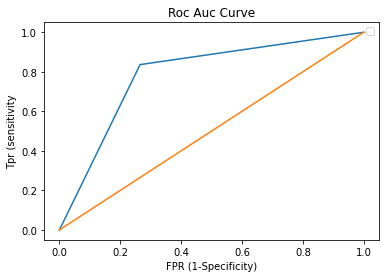

In [447]:
percent_mislabbled = (((y_test != y_pred).sum())/X_test.shape[0])*100


y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
df_test = pd.concat([y_pred_df, y_test_df], axis=1)

df_test1 = df_test[df_test['y_test'] == 1]
df_test0 = df_test[df_test['y_test'] == 0]


total_ones = len(df_test[df_test['y_test'] == 1])
number_of_mislabbled_ones = (df_test1.y_test != df_test1.ypred).sum()

total_zeroes = len(df_test[df_test['y_test'] == 0])
number_of_mislabbled_zeroes = (df_test0.y_test != df_test0.ypred).sum()
    


print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precission Score: {precision_score(y_test,y_pred)}')
print(f'percentage mislabbled: {percent_mislabbled}')
print(f'total ones: {total_ones}')
print(f'Number of Mislabbled Ones: {number_of_mislabbled_ones}')
print(f'total zeroes: {total_zeroes}')
print(f'Number of Mislabbled zeroes: {number_of_mislabbled_zeroes}')   
print(f'Recall Score: {recall_score(y_test,y_pred)}')
print(f'F1-Score: {f1_score(y_test,y_pred)}')

from sklearn.metrics import roc_curve

fpr, tpr, th = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([1,0], [1, 0])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('Tpr (sensitivity')
plt.title('Roc Auc Curve')
plt.legend()
plt.show()
